PORTFOLIO PERFORMANCE AND EFFICIENT FRONTIER ESTIMATION

In [34]:
import yfinance as yf
import pandas as pd
import numpy as np
import quantstats as qs
import seaborn as sns
from pylab import mpl, plt
plt.style.use('seaborn')
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as scs
import statsmodels.api as sm
import math

C:\Users\aaron\AppData\Local\Temp\ipykernel_5896\3700991755.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


WE DOWNLOAD ASSET PRICES FROM YAHOO FINANCE

In [4]:
ASSETS = ["AAPL", "AMZN", "BRK-B", "GOOG", "META", "MSFT", "NVDA", "TSLA"]
n_assets = len(ASSETS)

prices_df = yf.download(ASSETS, start = "2018-05-26", end = "2023-05-31")

[*********************100%***********************]  8 of 8 completed


In [5]:
prices_df

Adj Close                                                   
                  AAPL        AMZN       BRK-B        GOOG        META   
Date                                                                     
2018-05-29   44.892838   80.643501  189.869995   53.015999  185.740005  \
2018-05-30   44.797279   81.244499  194.100006   53.389999  187.669998   
2018-05-31   44.646763   81.481003  191.529999   54.249500  191.779999   
2018-06-01   45.451923   82.077003  192.229996   55.974998  193.990005   
2018-06-04   45.831795   83.263496  191.300003   56.964500  193.279999   
...                ...         ...         ...         ...         ...   
2023-05-23  171.559998  114.989998  323.109985  123.290001  246.740005   
2023-05-24  171.839996  116.750000  320.200012  121.639999  249.210007   
2023-05-25  172.990005  115.000000  319.019989  124.349998  252.690002   
2023-05-26  175.429993  120.110001  320.600006  125.430000  262.040009   
2023-05-30  177.300003  121.660004  322.190002  124.639999  262.519989   

                                                     Close              ...   
                  MSFT        NVDA        TSLA        AAPL        AMZN  ...   
Date                                                                    ...   
2018-05-29   92.697632   61.586311   18.917334   46.974998   80.643501  ...  \
2018-05-30   93.586678   62.676380   19.448000   46.875000   81.244499  ...   
2018-05-31   93.482651   62.478180   18.982000   46.717499   81.481003  ...   
2018-06-01   95.326965   63.823421   19.454666   47.560001   82.077003  ...   
2018-06-04   96.159241   65.614594   19.782667   47.957500   83.263496  ...   
...                ...         ...         ...         ...         ...  ...   
2023-05-23  315.260010  306.880005  185.770004  171.559998  114.989998  ...   
2023-05-24  313.850006  305.380005  182.899994  171.839996  116.750000  ...   
2023-05-25  325.920013  379.799988  184.470001  172.990005  115.000000  ...   
2023-05-26  332.890015  389.459991  193.169998  175.429993  120.110001  ...   
2023-05-30  331.209991  401.109985  201.160004  177.300003  121.660004  ...   

                  Open                 Volume                                
                  NVDA        TSLA       AAPL      AMZN    BRK-B      GOOG   
Date                                                                         
2018-05-29   62.137501   18.567333   90056400  76930000  8912100  37302000  \
2018-05-30   62.487499   18.886000   74762000  58148000  4307600  22770000   
2018-05-31   62.924999   19.147333  109931200  63326000  5787500  61766000   
2018-06-01   63.500000   19.057333   93770000  66268000  3817800  48432000   
2018-06-04   64.750000   19.622667  105064800  63754000  4444500  37792000   
...                ...         ...        ...       ...      ...       ...   
2023-05-23  310.000000  186.199997   50747300  67576300  4029300  24477900   
2023-05-24  302.100006  182.229996   45143500  63487900  3071500  23087900   
2023-05-25  385.230011  186.539993   56058300  66496700  4245400  33812700   
2023-05-26  378.899994  184.619995   54835000  96779900  3229400  25154700   
2023-05-30  405.950012  200.100006   55964400  64314800  3231800  27230700   

                                                      
                META      MSFT       NVDA       TSLA  
Date                                                  
2018-05-29  16398900  28671000   35268400   84999000  
2018-05-30  13736900  22158500   39099600  112345500  
2018-05-31  30782600  34140900   49386800   88795500  
2018-06-01  17307200  28655600   42196800   81366000  
2018-06-04  18939800  27281600   64202400   71967000  
...              ...       ...        ...        ...  
2023-05-23  17748100  30797200   35625300  156952100  
2023-05-24  17724300  23384900   72141900  137605100  
2023-05-25  22371400  43301700  154391100   96870700  
2023-05-26  25727200  36630600   71439700  162061500  
2023-05-30  23816500  29503100   92340100  128818700  

[1260

<Axes: xlabel='Date'>

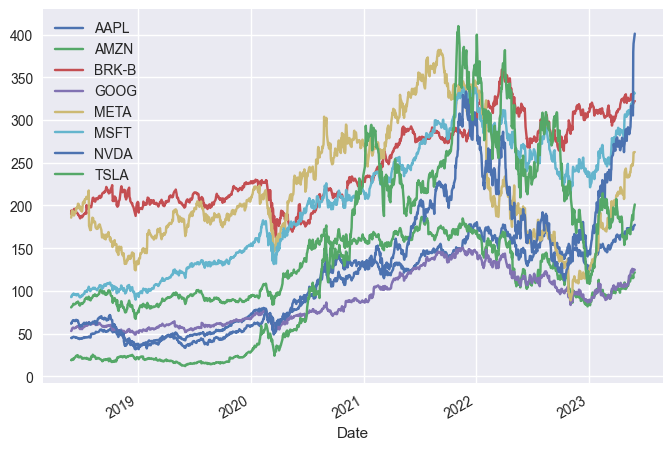

In [6]:
prices_df["Adj Close"].plot()

WE CALCULATE SIMPLE INDIVIDUAL ASSET RETURNS

In [7]:
returns = prices_df["Adj Close"].pct_change().dropna()

In [8]:
returns

,AAPL,AMZN,BRK-B,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,,
2018-05-30,-0.002129,0.007453,0.022278,0.007054,0.010391,0.009591,0.017700,0.028052
2018-05-31,-0.003360,0.002911,-0.013241,0.016099,0.021900,-0.001112,-0.003162,-0.023961
2018-06-01,0.018034,0.007315,0.003655,0.031807,0.011524,0.019729,0.021531,0.024901
2018-06-04,0.008358,0.014456,-0.004838,0.017678,-0.003660,0.008731,0.028064,0.016860
2018-06-05,0.007715,0.018664,-0.002771,0.000325,-0.001759,0.005115,0.000831,-0.018905
...,...,...,...,...,...,...,...,...
2023-05-23,-0.015155,-0.000174,-0.018291,-0.020497,-0.006363,-0.018432,-0.015653,-0.016413
2023-05-24,0.001632,0.015306,-0.009006,-0.013383,0.010011,-0.004473,-0.004888,-0.015449
2023-05-25,0.006692,-0.014989,-0.003685,0.022279,0.013964,0.038458,0.243696,0.008584


<Axes: xlabel='Date'>

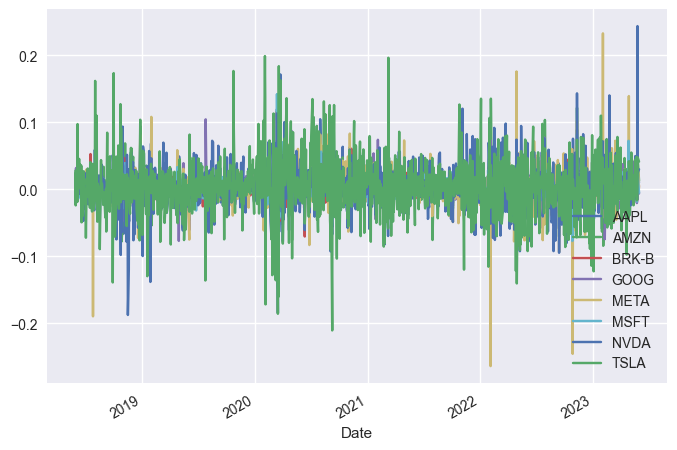

In [9]:
returns.plot()

WE ESTIMATE LOGARITHMIC RETURNS

Text(0.5, 1.0, 'Daily Log Returns')

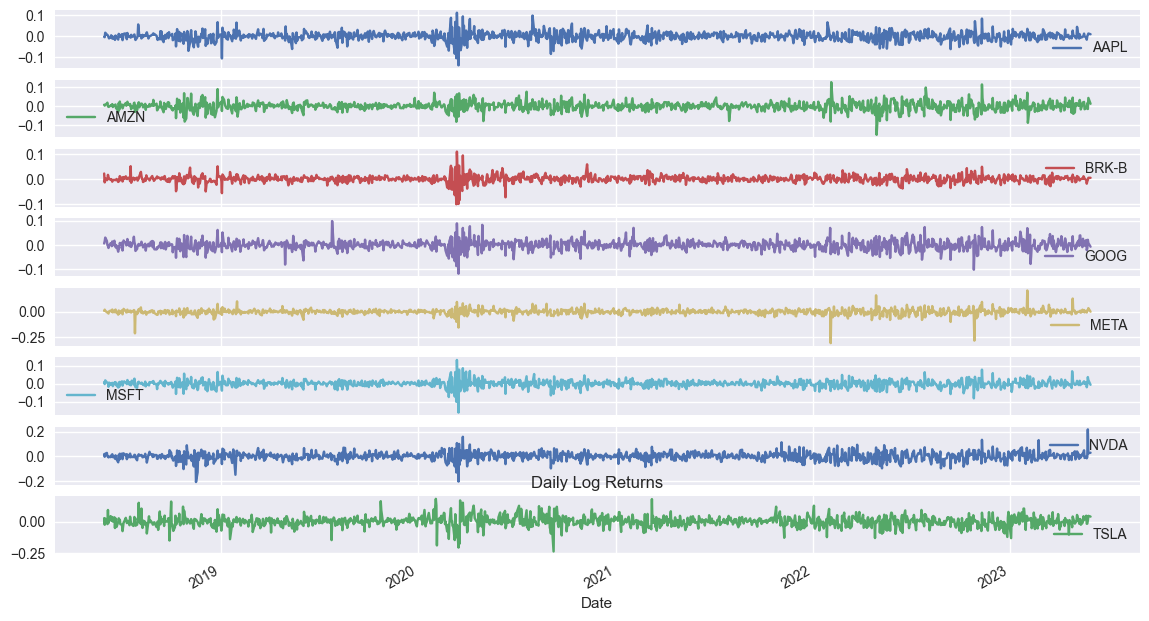

In [10]:
log_returns = np.log(prices_df["Adj Close"]/prices_df["Adj Close"].shift(1)).dropna()
log_returns.plot(subplots = True, figsize = (14,8))
plt.title('Daily Log Returns')

HISTOGRAM OF RESPECTIVE LOG RETURNS (NORMALITY TEST 1)

array([[<Axes: title={'center': 'AAPL'}>,
        <Axes: title={'center': 'AMZN'}>,
        <Axes: title={'center': 'BRK-B'}>],
       [<Axes: title={'center': 'GOOG'}>,
        <Axes: title={'center': 'META'}>,
        <Axes: title={'center': 'MSFT'}>],
       [<Axes: title={'center': 'NVDA'}>,
        <Axes: title={'center': 'TSLA'}>, <Axes: >]], dtype=object)

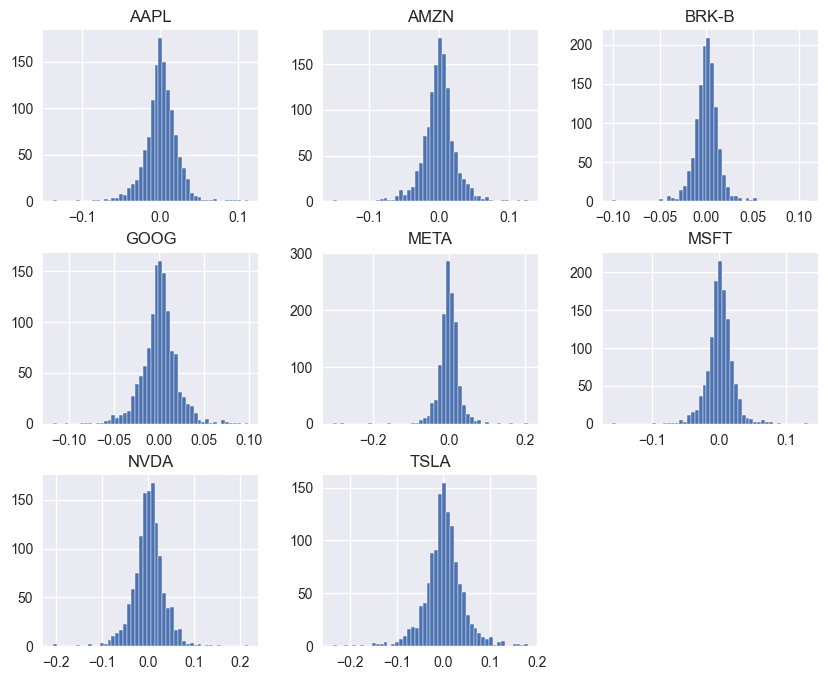

In [11]:
log_returns.hist(bins= 50, figsize=(10,8))

QUANTILE-QUANTILE PLOT FOR LOG RETURNS (NORMALITY TEST 2)

Text(0, 0.5, 'sample quantiles')

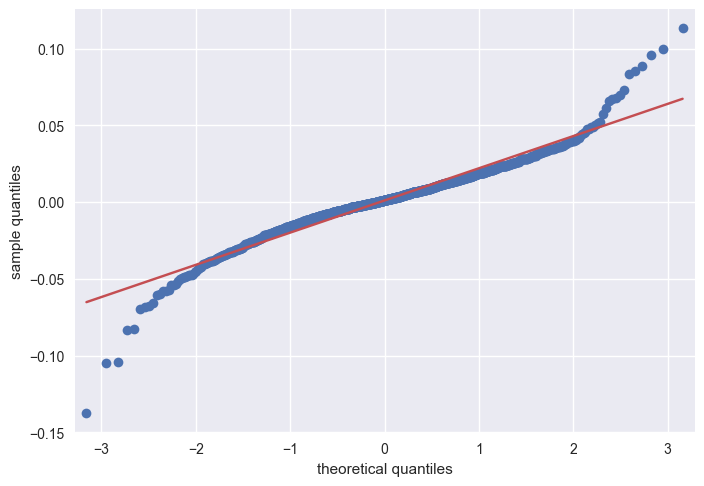

In [12]:
sm.qqplot(log_returns['AAPL'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

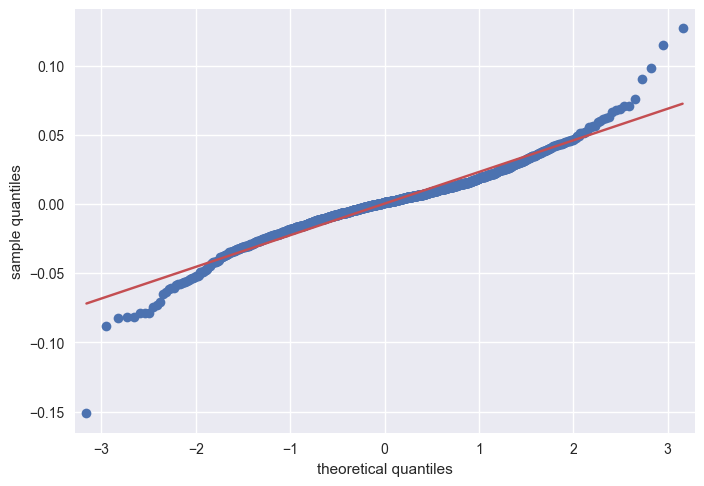

In [13]:
sm.qqplot(log_returns['AMZN'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

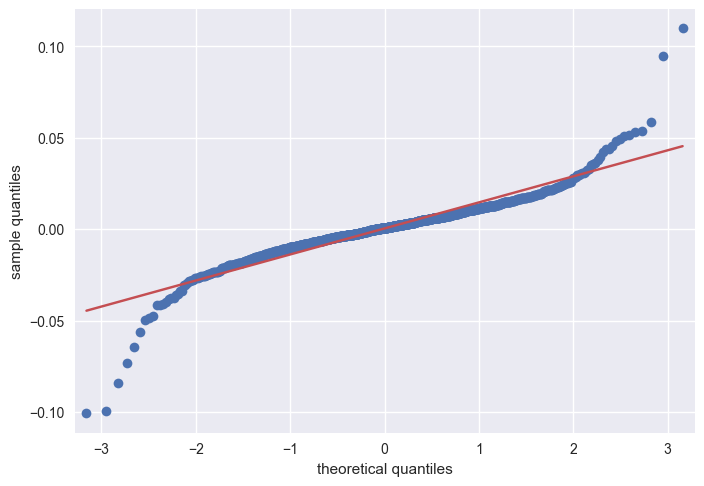

In [14]:
sm.qqplot(log_returns['BRK-B'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

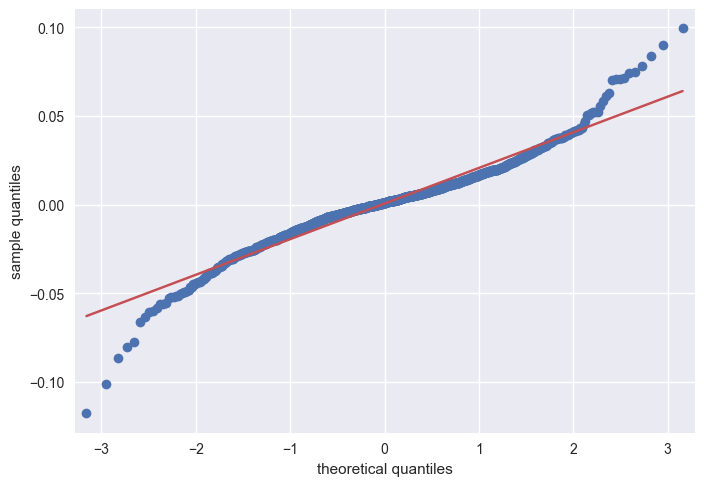

In [15]:
sm.qqplot(log_returns['GOOG'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

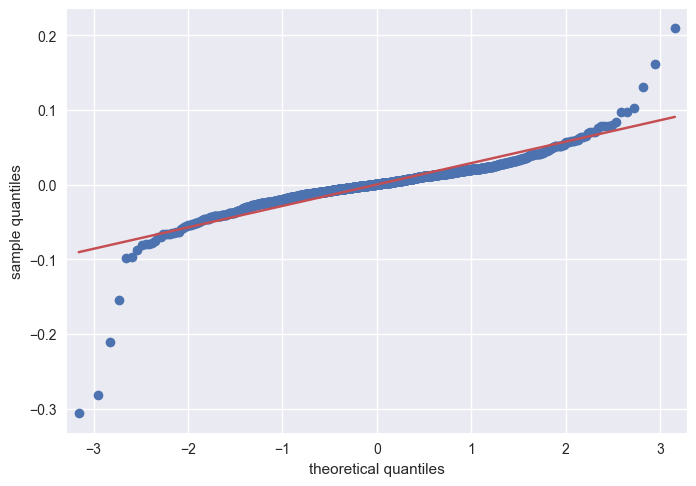

In [16]:
sm.qqplot(log_returns['META'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

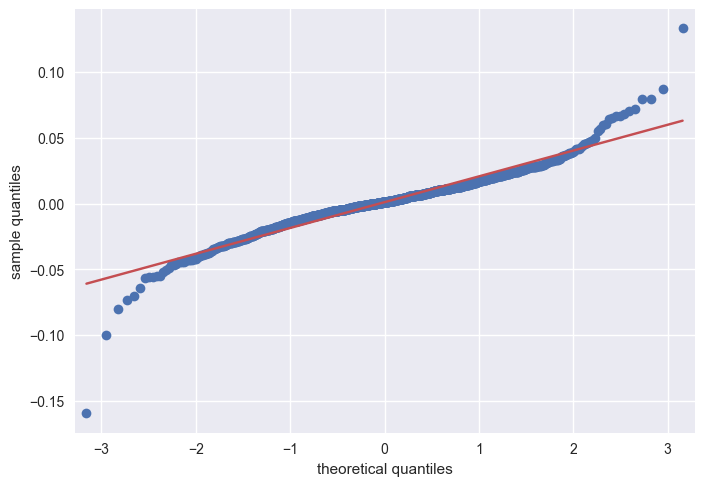

In [17]:
sm.qqplot(log_returns['MSFT'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

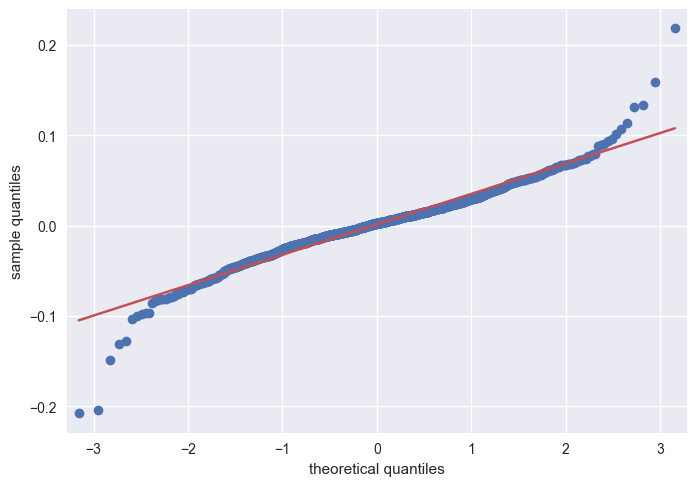

In [18]:
sm.qqplot(log_returns['NVDA'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

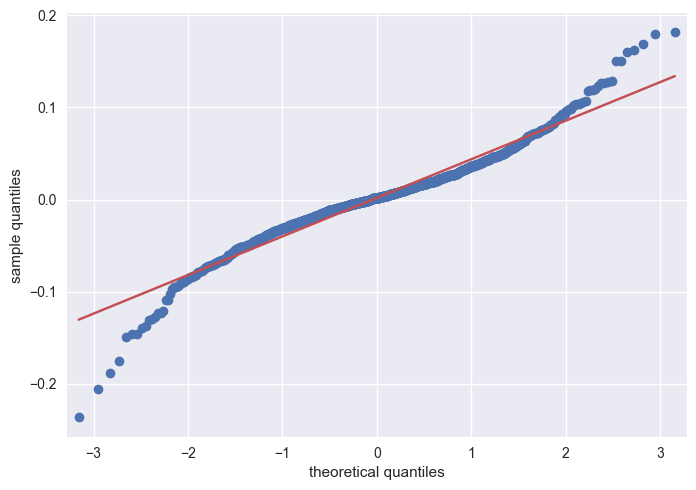

In [19]:
sm.qqplot(log_returns['TSLA'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

WE ESTIMATE ANNUAL LOG_RETURNS MEAN, COVARIANCE AND CORRELATION MATRICES

In [20]:
log_returns.mean()*252

AAPL     0.274931
AMZN     0.082304
BRK-B    0.105844
GOOG     0.171103
META     0.069251
MSFT     0.254884
NVDA     0.375057
TSLA     0.473180
dtype: float64

In [21]:
log_returns.cov()*252

,AAPL,AMZN,BRK-B,GOOG,META,MSFT,NVDA,TSLA
AAPL,0.110985,0.078852,0.043748,0.073648,0.087221,0.079566,0.116553,0.106065
AMZN,0.078852,0.131910,0.033575,0.079456,0.100830,0.080419,0.120374,0.102788
BRK-B,0.043748,0.033575,0.051241,0.039237,0.040254,0.040617,0.054489,0.043343
GOOG,0.073648,0.079456,0.039237,0.101737,0.095836,0.078135,0.108425,0.085963
META,0.087221,0.100830,0.040254,0.095836,0.207535,0.086361,0.130212,0.100889
MSFT,0.079566,0.080419,0.040617,0.078135,0.086361,0.096847,0.117112,0.094671
NVDA,0.116553,0.120374,0.054489,0.108425,0.130212,0.117112,0.285179,0.170656
TSLA,0.106065,0.102788,0.043343,0.085963,0.100889,0.094671,0.170656,0.441952


In [22]:
log_returns.corr()

,AAPL,AMZN,BRK-B,GOOG,META,MSFT,NVDA,TSLA
AAPL,1.000000,0.651695,0.580121,0.693091,0.574699,0.767456,0.655138,0.478910
AMZN,0.651695,1.000000,0.408384,0.685880,0.609405,0.711507,0.620635,0.425714
BRK-B,0.580121,0.408384,1.000000,0.543436,0.390347,0.576574,0.450753,0.288021
GOOG,0.693091,0.685880,0.543436,1.000000,0.659541,0.787161,0.636545,0.405401
META,0.574699,0.609405,0.390347,0.659541,1.000000,0.609153,0.535236,0.333128
MSFT,0.767456,0.711507,0.576574,0.787161,0.609153,1.000000,0.704690,0.457601
NVDA,0.655138,0.620635,0.450753,0.636545,0.535236,0.704690,1.000000,0.480702
TSLA,0.478910,0.425714,0.288021,0.405401,0.333128,0.457601,0.480702,1.000000


WE PLOT A CORRELATION MATRIX WITH A HEATMAP STYLE 

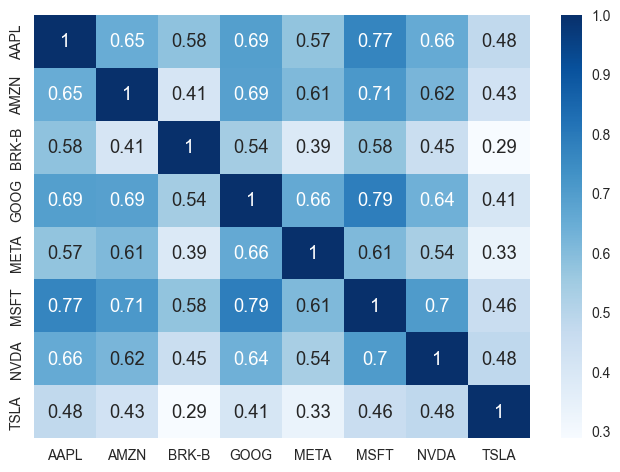

In [23]:
sns.heatmap(log_returns.corr(), annot = True, cmap= "Blues")
plt.show()

WE DEFINE THE WEIGHTS

In [24]:
Portfolio_weights = n_assets * [1 / n_assets]

In [25]:
Portfolio_weights

[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]

WE CALCULATE PORTFOLIO RETURNS

In [26]:
portfolio_returns = pd.Series(np.dot(Portfolio_weights, log_returns.T), index= log_returns.index)

In [27]:
portfolio_returns

Date
2018-05-30    0.012431
2018-05-31   -0.000586
2018-06-01    0.017127
2018-06-04    0.010596
2018-06-05    0.001102
                ...   
2023-05-23   -0.013991
2023-05-24   -0.002586
2023-05-25    0.036019
2023-05-26    0.024971
2023-05-30    0.011104
Length: 1259, dtype: float64

WE GET BASIC PORTFOLIO PERFORMANCE

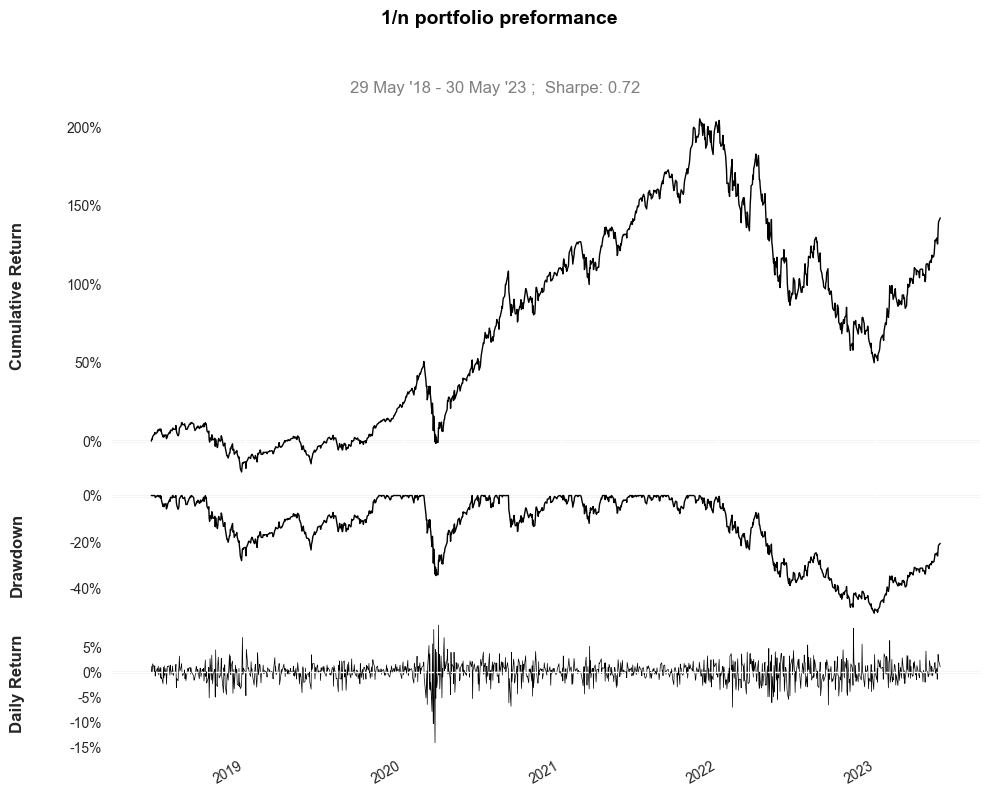

In [28]:
qs.plots.snapshot(portfolio_returns, title = "1/n portfolio preformance", grayscale = True)

WE CALCULATE BASIC PORTFOLIO EVALUATION METRICS

In [29]:
qs.reports.metrics(portfolio_returns, mode = "basic", prepare_returns= False)

                    Strategy
------------------  ----------
Start Period        2018-05-30
End Period          2023-05-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   142.09%
CAGR﹪              19.33%

Sharpe              0.73
Prob. Sharpe Ratio  94.52%
Sortino             1.01
Sortino/√2          0.71
Omega               1.14

Max Drawdown        -50.89%
Longest DD Days     554

Gain/Pain Ratio     0.14
Gain/Pain (1M)      0.72

Payoff Ratio        0.89
Profit Factor       1.14
Common Sense Ratio  1.05
CPC Index           0.57
Tail Ratio          0.93
Outlier Win Ratio   3.47
Outlier Loss Ratio  3.47

MTD                 13.74%
3M                  28.24%
6M                  43.23%
YTD                 55.83%
1Y                  11.97%
3Y (ann.)           18.47%
5Y (ann.)           18.95%
10Y (ann.)          19.33%
All-time (ann.)     19.33%

Avg. Drawdown       -4.34%
Avg. Drawdown Days  29
Recovery Factor     2.79
Ulcer Index         0.19
Serenity Index    

PORTFOLIO OPTIMIZATION USING MONTECARLO SIMULATION

In [30]:
weights = np.random.random(n_assets)
weights /= np.sum(weights)
weights
  

array([0.03032263, 0.24557537, 0.06850559, 0.23578646, 0.09386184,
       0.13296394, 0.0695277 , 0.12345646])

In [31]:
weights.sum()

1.0

WE ESTIMATE ANNUALIZED EXPECTED PORTFOLIO RETURN

In [32]:
np.sum(log_returns.mean()*weights)*252

0.2010274869148847

WE ESTIMATE ANNUALIZED (EXPECTED) PORTFOLIO VARIANCE

In [33]:
np.dot(weights.T, np.dot(log_returns.cov()*252, weights))


0.09689103378594173

WE ESTIMATE ANNUALIZED EXPECTED PORTFOLIO VOLATILITY

In [35]:
math.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights)))

0.31127324617760155

MONTECARLO SIMULATION TO GENERATE RANDOM PORTFOLIO

In [43]:
prets = []
pvols = []
for  p in range (1500):
     weights = np.random.random(n_assets)
     weights /= np.sum(weights)
     prets.append(np.sum(log_returns.mean()*weights)*252)
     pvols.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)
     
     
     

WE PLOT THE EFFICIENT FRONTIER

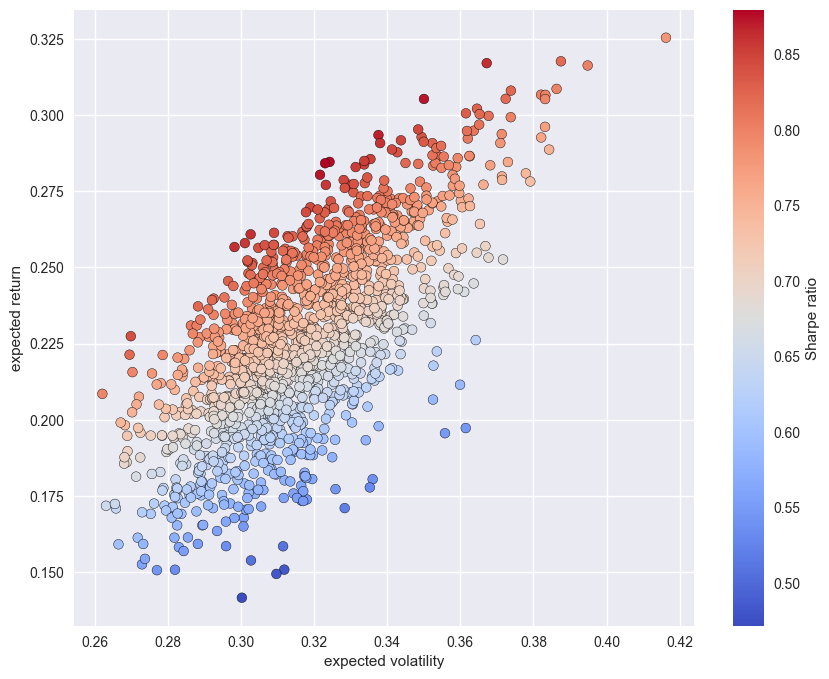

In [46]:
plt.figure(figsize=(10,8))
plt.scatter(pvols, prets, c=prets / pvols, marker = 'o', cmap= 'coolwarm', edgecolors= "black")
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')